# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

# MNIST DATA

In [ ]:
X, y = fetch_openml(name='mnist_784', return_X_y=True)

In [ ]:
X.shape   # (n_samples, n_features)

(70000, 784)

In [ ]:
y.shape    # (n_samples, )

(70000,)

In [ ]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [ ]:
y = y.astype(np.int8)

In [ ]:
y.dtype

dtype('int8')

In [ ]:
X.dtype

dtype('float64')

In [ ]:
np.min(X[0])

0.0

In [ ]:
np.max(X[0])

255.0

In [ ]:
X_scaled = X / 255.0    # 데이터의 범위를 0~255 에서 0~1로 스케일링

In [ ]:
plt.imshow(X_scaled[0], )

## Train/Test split

In [ ]:
num_train = 60_000

In [ ]:
X_train, X_test = X[:num_train], X[num_train:]

In [ ]:
y_train, y_test = y[:num_train], y[num_train:]

In [ ]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

# PCA(Principal Component Analysis)





## MNIST 데이터의 차원을 2차원으로 축소 후 시각화

In [ ]:
pca = PCA(n_components=2)  # PCA 객체 생성 

In [ ]:
X_train_reduced = pca.fit_transform(X_train) 
# fit: 주성분 찾음
# transform: 주성분 방향으로 투영(projection) -> 차원 축소

In [ ]:
X_train_reduced.shape

(60000, 2)

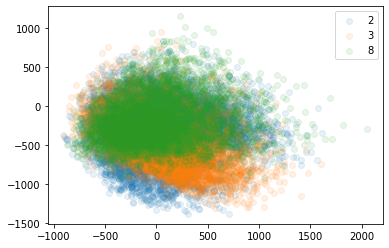

In [ ]:
# 훈련셋에서 숫자 2, 3, 5 시각화
for n in (2, 3, 8):
  subset = X_train_reduced[y_train == n]
  plt.scatter(subset[:, 0], subset[:, 1], alpha=0.1, label=n)

plt.legend()
plt.show()

# 95% explained variance ratio

In [ ]:
pca = PCA(n_components=0.95, random_state=42)

In [ ]:
start_time = time.time()   # fit 시작 시간 기록
pca.fit_transform(X_train)
end_time = time.time()

In [ ]:
end_time - start_time  # 95% 분산을 설명하는 주성분을 찾는데 걸린 시간(초)

11.90461802482605

In [ ]:
start_time = time.time()
X_train_reduced = pca.transform(X_train)   # 차원 축소
end_time = time.time()

In [ ]:
end_time - start_time   # 차원 축소에 걸린 시간

0.6969327926635742

### 차원 축소 전 훈련 셋 fit 시간 측정, 성능

In [ ]:
forest_clf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
start_time = time.time()
forest_clf.fit(X_train, y_train)  # 모델 훈련
end_time = time.time()

In [ ]:
fit_time = end_time - start_time
fit_time

36.43807888031006

In [ ]:
# 테스트 셋 평가 시간
start_time = time.time()
acc = forest_clf.score(X_test, y_test)
end_time = time.time()

In [ ]:
score_time = end_time - start_time
score_time

0.4328172206878662

In [ ]:
acc  # 테스트 셋의 정확도

0.9705

### 차원 축소 후 fit 시간 측정, 성능

In [ ]:
pca.n_components_

154

In [ ]:
start_time = time.time()
forest_clf.fit(X_train_reduced, y_train)   # 차원이 축소된 훈련 셋을 학습
end_time = time.time()

In [ ]:
fit_time_pca = end_time - start_time
fit_time_pca

차원 축소된 훈련 셋이 항상 학습 시간을 줄여주는것은 아님님

In [51]:
# 테스트 셋으로 모델을 평가하려면, 
# 차원 축소된 훈련셋으로 학습됐기 때문에, 테스트 셋도 차원 축소 후에 예측 평가를 수행해야함!
X_test_reduce = pca.transform(X_test)

In [53]:
start_time = time.time()
acc_pca = forest_clf.score(X_test_reduce, y_test)
end_time = time.time()

In [54]:
score_time_pca = end_time - start_time
score_time_pca

0.41803908348083496

In [55]:
acc_pca

0.9481

차원 축소가 오히려 성능을 더 안좋게 만듬! 

In [56]:
forest_clf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [57]:
start_time = time.time()
forest_clf.fit(X_train_reduced, y_train)   # 차원이 축소된 훈련 셋을 학습
end_time = time.time()

In [57]:
X_test_reduce = pca.transform(X_test)

In [58]:
start_time = time.time()
acc_pca = forest_clf.score(X_test_reduce, y_test)
end_time = time.time()

In [59]:
acc_pca

0.9481

## SGDClassifier 비교

In [60]:
sgd_clf = SGDClassifier(loss='log',n_jobs=-1, random_state=42)

차원 축소전 훈련 셋 학습, 평가

In [61]:
start_time = time.time()
sgd_clf.fit(X_train, y_train)  # 학습
end_time = time.time()

In [63]:
fit_time = end_time - start_time
fit_time

101.72673797607422

In [64]:
start_time = time.time()
acc = sgd_clf.score(X_test, y_test)
end_time = time.time()

In [65]:
score_time = end_time - start_time
score_time

0.062082529067993164

In [66]:
acc

0.8784

차원 축소 후 훈련시간, 성능

In [68]:
sgd_clf = SGDClassifier(loss='log', n_jobs=-1, random_state=42)
start_time = time.time()
sgd_clf.fit(X_train_reduced, y_train)  # 훈련
end_time = time.time()

In [69]:
fit_time_pca = end_time - start_time
fit_time_pca

32.404526233673096

In [70]:
start_time = time.time()
acc_pca = sgd_clf.score(X_test_reduce, y_test)
end_time = time.time()

In [71]:
score_time_pca = end_time - start_time
score_time_pca

0.01842188835144043

In [72]:
acc_pca

0.8928

PCA를 사용한 차원 축소가 SGDClassifier에서는 훈련 시간도 줄이고, 성능도 좋아짐

KernelPCA 로 kernel 값 바꿔가면서 해보는것도 필요 

sklearn 싸이트에서 pca 검색 후 kernelPCA하고 pipeline과 같이 사용한 코드확인하고 연습해보기